# Telecom Customer Churn Case Study

You have been provided with a dataset related to telecom customer churn. Each row in the dataset represents a unique customer, and the columns contain various attributes and information about these customers.

The data set includes information about:
- Churn Column: Indicates customer churn within the last month.
- Services Info: Subscribed services like phone, internet, etc.
- Account Details: Tenure, contract, billing, charges.
- Demographics: Gender, age, and family status.


## Load the dataset in a dataframe

In [43]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [18]:
#1. import the provided dataset to dataframe (telecom_customer_churn.csv)
#2. change the settings to display all the columns
#3. check the number of rows and columns
#4. check the top 5 rows

df = pd.read_csv("dataset.csv")
print(df.shape)
df.head(5)

(7043, 21)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Male,0.0,No,No,1.067845,Yes,Yes,No,Yes,...,No,Yes,Yes,No internet service,One year,No,Mailed check,31.741201,735.90,Yes
1,5575-GNVDE,Male,0.0,No,No,35.520282,No,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No,One year,No,Bank transfer (automatic),56.633707,2606.35,No
2,3668-QPYBK,Male,0.0,No,Yes,1.939141,Yes,No phone service,DSL,No internet service,...,No internet service,No internet service,No internet service,Yes,Month-to-month,Yes,Credit card (automatic),55.068603,705.45,No
3,7795-CFOCW,Male,0.0,Yes,Yes,40.620572,Yes,No phone service,Fiber optic,No,...,Yes,No,No internet service,No internet service,One year,No,Mailed check,38.749337,29.15,Yes
4,9237-HQITU,Female,0.0,No,No,1.956284,Yes,No phone service,DSL,No internet service,...,Yes,Yes,Yes,No,Month-to-month,No,Mailed check,65.018461,3177.25,Yes


In [19]:
#display all the column names

df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [20]:
# Check if the dataset contains nulls
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [21]:
#check the datatype of all columns

df.dtypes

customer_id           object
gender                object
senior_citizen       float64
partner               object
dependents            object
tenure               float64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [26]:
# Fix the datatype
df["senior_citizen"] = pd.to_numeric(df["senior_citizen"], errors="coerce")
df["tenure"] = pd.to_numeric(df["tenure"], errors="coerce")


df["senior_citizen"] = df["senior_citizen"].astype(int)
df["tenure"] = df["tenure"].astype(int)
df.dtypes

customer_id           object
gender                object
senior_citizen         int64
partner               object
dependents            object
tenure                 int64
phone_service         object
multiple_lines        object
internet_service      object
online_security       object
online_backup         object
device_protection     object
tech_support          object
streaming_tv          object
streaming_movies      object
contract              object
paperless_billing     object
payment_method        object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

Q1 - Calculate the mean, median, and mode of the monthly_charges column

In [78]:
mean = df["monthly_charges"].mean()
median = df["monthly_charges"].median()
mode = df["monthly_charges"].mode()[0]

mean, median, mode

(np.float64(64.69047594165144),
 np.float64(70.11675154192427),
 np.float64(16.951399178634666))

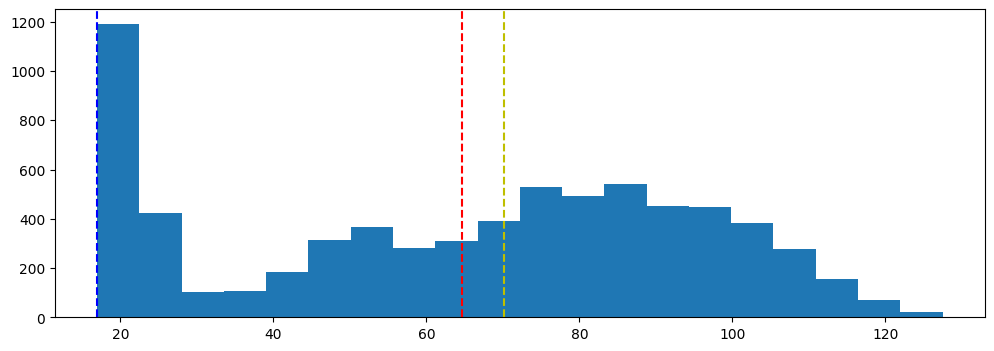

In [84]:
plt.figure(figsize=(12,4))

plt.hist(df["monthly_charges"], bins=20)
plt.axvline(mean, c="r", ls="--")
plt.axvline(median, c="y", ls="--")
plt.axvline(mode, c="b", ls="--")

plt.show()

Q2 - Calculate the 25th, 50th, and 75th percentiles of the total_charges column

In [97]:
percentiles = df["total_charges"].quantile([.25, .5, .75])

percentiles

0.25     535.2
0.50    1558.7
0.75    4039.3
Name: total_charges, dtype: float64

Q3 - Calculate the range of monthly_charges column?

Hint - Range is the difference between max and min of monthly_charges.

In [92]:
round(df["monthly_charges"].max() - df["monthly_charges"].min())

111

Q4 - What is the first quartile of the monthly_charges column for customers who have not churned?

In [100]:
df["churn"].value_counts()

churn
Yes    3595
No     3448
Name: count, dtype: int64

In [107]:
percentile = df.loc[df["churn"] == "No", "monthly_charges"].quantile(0.25)
percentile

np.float64(36.68633540206135)

Q5 - What is the third quartile of the total_charges column for customers who have churned?

In [108]:
percentile = df.loc[df["churn"] == "Yes", "total_charges"].quantile(0.75)
percentile

np.float64(4018.05)

Q6-  What is the mode of the payment method column for customers who have churned?

In [109]:
mode_payment = df.loc[df["churn"] == "Yes", "payment_method"].mode()[0]
mode_payment

'Electronic check'

Q7 - What is the mean of the total charges column for customers who have churned and have a month-to-month contract?

In [114]:
df["contract"].value_counts()

contract
Two year          2374
One year          2357
Month-to-month    2312
Name: count, dtype: int64

In [118]:
# Filter the rows based on the churn status and contract type
df_filtered = df.loc[(df["churn"] == "Yes") & (df["contract"] == "Month-to-month"), "total_charges"]

# Calculate the mean of the total charges column
mean = df_filtered.mean()

# Print the result
mean

np.float64(2448.2522687609076)

Q8 - What is the median of the tenure column for customers who have not churned and have a two-year contract?

In [119]:
# Filter the rows based on the churn status and contract type
df_filtered = df.loc[(df["churn"] == "No") & (df["contract"] == "Two year"), "tenure"]

# Calculate the median of the tenure column
median = df_filtered.median()

# Print the result
median


np.float64(26.0)